In [ ]:
import boto3
import pandas as pd

comprehend_client = boto3.client('comprehend', region_name='us-east-1')

# Read CSV file
amazon_q_df = pd.read_csv('amazon_q.csv')
texts = amazon_q_df['Text']  
len(texts)


In [4]:
sentiments = []

# Analyze text using Amazon Comprehend
for text in texts:
    sentiment_response = comprehend_client.detect_sentiment(Text=text, LanguageCode='en')
    sentiment_scan = sentiment_response['Sentiment']

    # Add the text and its corresponding sentiment to the list
    sentiments.append({'Text': text, 'Sentiment': sentiments})

sentiment_df = pd.DataFrame(sentiments)

# Display the DataFrame
print(sentiment_df.head())


                                                Text  \
0  Amazon Q: A new type of generative AI assistan...   
1  Amazon Q can help you get fast, relevant answe...   
2  Introducing Amazon Q, a new generative AI-powe...   
3  AWS launches Amazon Q, makes its case to be yo...   
4  Introducing Amazon Q: the generative AI-powere...   

                                           Sentiment  
0  [{'Text': 'Amazon Q: A new type of generative ...  
1  [{'Text': 'Amazon Q: A new type of generative ...  
2  [{'Text': 'Amazon Q: A new type of generative ...  
3  [{'Text': 'Amazon Q: A new type of generative ...  
4  [{'Text': 'Amazon Q: A new type of generative ...  


In [5]:
import boto3
import pandas as pd

comprehend_client = boto3.client('comprehend')

df = pd.read_csv('amazon_q.csv')
texts = df['Text'] 

results = []

# Analyze each text with Amazon Comprehend
for index, text in enumerate(texts):
    # Detect sentiment
    sentiment_response = comprehend_client.detect_sentiment(Text=text, LanguageCode='en')
    
    sentiment_scores = sentiment_response['SentimentScore']
    sentiment = sentiment_response['Sentiment']
    
    # Append the results including the file name and line number
    results.append({
        'Mixed': sentiment_scores['Mixed'],
        'Negative': sentiment_scores['Negative'],
        'Neutral': sentiment_scores['Neutral'],
        'Positive': sentiment_scores['Positive'],
        'File': 'amazon_q.csv',  
        'Line': index + 2,  
        'Sentiment': sentiment
    })

# Convert the results list to a DataFrame
sentiment_df = pd.DataFrame(results)

print(sentiment_df)


       Mixed  Negative   Neutral  Positive          File  Line Sentiment
0   0.000047  0.000175  0.972401  0.027377  amazon_q.csv     2   NEUTRAL
1   0.000147  0.000117  0.823304  0.176431  amazon_q.csv     3   NEUTRAL
2   0.000035  0.000076  0.997155  0.002734  amazon_q.csv     4   NEUTRAL
3   0.000075  0.000984  0.876546  0.122395  amazon_q.csv     5   NEUTRAL
4   0.000054  0.000066  0.977568  0.022312  amazon_q.csv     6   NEUTRAL
5   0.000022  0.000157  0.973160  0.026661  amazon_q.csv     7   NEUTRAL
6   0.000025  0.000087  0.016006  0.983882  amazon_q.csv     8  POSITIVE
7   0.000561  0.000228  0.524221  0.474991  amazon_q.csv     9   NEUTRAL
8   0.000561  0.000228  0.524221  0.474991  amazon_q.csv    10   NEUTRAL
9   0.004764  0.027670  0.281765  0.685801  amazon_q.csv    11  POSITIVE
10  0.000066  0.101848  0.897200  0.000886  amazon_q.csv    12   NEUTRAL
11  0.000536  0.000425  0.044190  0.954850  amazon_q.csv    13  POSITIVE
12  0.000054  0.000499  0.073821  0.925627  amazon_

In [6]:
#Visualize these texts by sentiments (mixed, neutral, positive, negative)

import seaborn as sns
import matplotlib as plt

percentage = (sentiment_df.groupby(['Sentiment']).size())
percentage

Sentiment
MIXED        1
NEGATIVE     1
NEUTRAL     32
POSITIVE     9
dtype: int64

/tmp/ipykernel_503/1589608015.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Percentage', data=percentage_new, palette='hls')


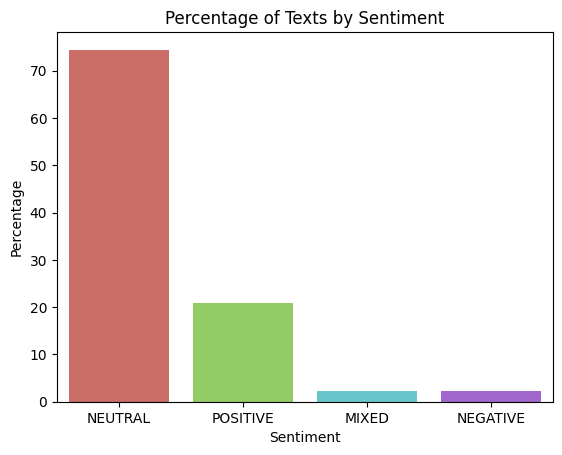

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the percentage of each sentiment
percentage_new = (sentiment_df['Sentiment'].value_counts(normalize=True) * 100).reset_index()
percentage_new.columns = ['Sentiment', 'Percentage']  

# Create a bar plot using Seaborn
sns.barplot(x='Sentiment', y='Percentage', data=percentage_new, palette='hls')

plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Percentage of Texts by Sentiment')

plt.show()


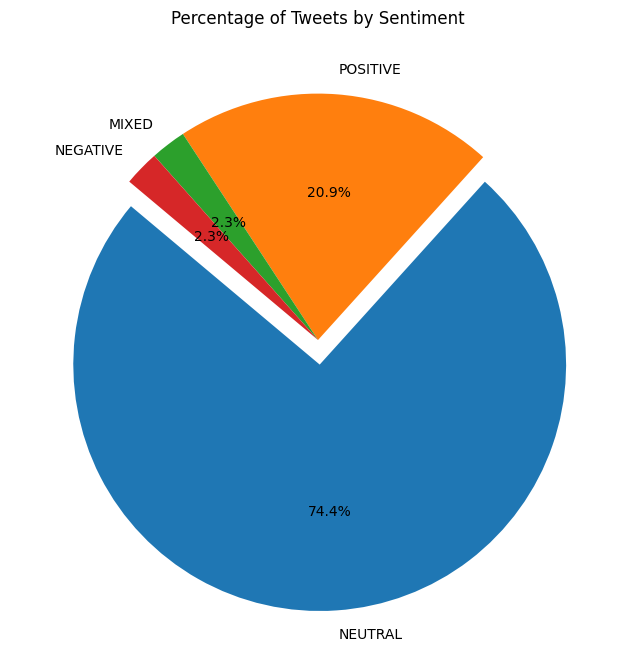

In [13]:
# Adjusting the explode parameter to match the number of unique sentiment categories in the data
unique_sentiments = sentiment_df['Sentiment'].nunique()
explode = [0.1 if i == 0 else 0 for i in range(unique_sentiments)]

plt.figure(figsize=(8, 8))
plt.pie(percentage_new['Percentage'], labels=percentage_new['Sentiment'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Percentage of Tweets by Sentiment')

plt.show()
